# Aggregate data to produce rankings

## Load data

In [1]:
path = '../../data/curva_pbc_uof/curva_pbc_uof_20241201.1.parquet'
path

'../../data/curva_pbc_uof/curva_pbc_uof_20241201.1.parquet'

In [2]:
import pandas as pd

df_base = pd.read_parquet(path)
df_base

,hour,date,country,unit,offer_type,energy,price,cleared
0,1.0,01/12/2024,MI,TOTRM01,C,266.8,1500.00,O
1,1.0,01/12/2024,MI,TOTRM03,C,87.5,1500.00,O
...,...,...,...,...,...,...,...,...
94995,24.0,01/12/2024,MI,EBRFEN,V,11.6,133.06,C
94996,24.0,01/12/2024,MI,SROQ2,V,156.4,133.21,C


## Filter by cleared offers

In [3]:
df_base = df_base.query('cleared == "C"')
df_base

,hour,date,country,unit,offer_type,energy,price,cleared
1877,1.0,01/12/2024,MI,TOTRM02,C,99.8,1500.00,C
1878,1.0,01/12/2024,MI,TOTRM01,C,266.8,1500.00,C
...,...,...,...,...,...,...,...,...
94995,24.0,01/12/2024,MI,EBRFEN,V,11.6,133.06,C
94996,24.0,01/12/2024,MI,SROQ2,V,156.4,133.21,C


## Unit with most offered energy

In [4]:
result = df_base.groupby(by='unit').energy.sum()
result

unit
ABA1        2.4
ABA2        2.4
           ... 
ZRMTC01    15.3
ZULUC01     7.9
Name: energy, Length: 2145, dtype: float64

In [5]:
ranking = result.sort_values(ascending=False).head(10)
ranking

unit
ENDE01     75004.6
MIEU       58923.0
            ...   
VAN2       18792.0
EGEDC01    18764.7
Name: energy, Length: 10, dtype: float64

<Axes: xlabel='unit'>

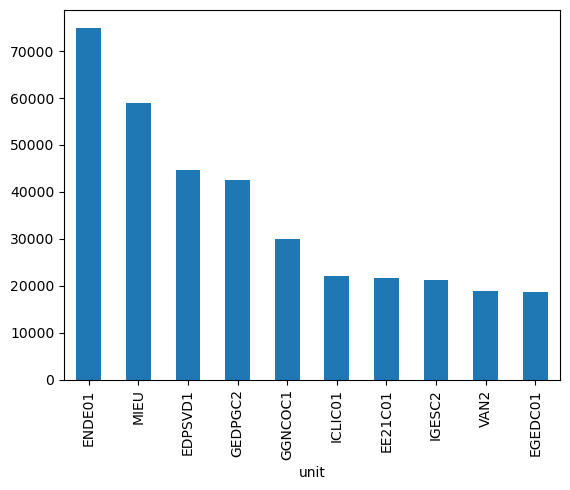

In [6]:
ranking.plot(kind='bar')

### Top 10 units by hour

In [7]:
ranking.index

Index(['ENDE01', 'MIEU', 'EDPSVD1', 'GEDPGC2', 'GGNCOC1', 'ICLIC01', 'EE21C01',
       'IGESC2', 'VAN2', 'EGEDC01'],
      dtype='object', name='unit')

In [8]:
df = df_base.query('unit == @ranking.index.tolist()')
df

,hour,date,country,unit,offer_type,energy,price,cleared
1886,1.0,01/12/2024,MI,GEDPGC2,C,1761.2,501.00,C
1893,1.0,01/12/2024,MI,IGESC2,C,874.3,500.00,C
...,...,...,...,...,...,...,...,...
94408,24.0,01/12/2024,MI,EDPSVD1,V,1116.7,-4.00,C
94610,24.0,01/12/2024,MI,EDPSVD1,V,279.2,-0.03,C


In [9]:
result = df.groupby(by=['unit', 'hour']).energy.sum()
result

unit     hour
EDPSVD1  1.0     2222.3
         2.0     2267.2
                  ...  
VAN2     23.0     783.0
         24.0     783.0
Name: energy, Length: 237, dtype: float64

In [10]:
df_result = result.reset_index()
df_result

,unit,hour,energy
0,EDPSVD1,1.0,2222.3
1,EDPSVD1,2.0,2267.2
...,...,...,...
235,VAN2,23.0,783.0
236,VAN2,24.0,783.0


In [11]:
import plotly.express as px
fig = px.line(df_result, x='hour', y='energy', color='unit', line_shape='hv', width=1000, height=600)
fig.show()

In [12]:
fig.update_layout(hovermode='x unified')

In [13]:
fig = px.area(df_result, x='hour', y='energy', color='unit', line_shape='hv', width=1000, height=600)
fig.update_layout(hovermode='x unified')

In [14]:
fig.write_image('top10_units_by_hour.png')